In [1]:
import pandas as pd
import seaborn as sns


In [2]:
bank = pd.read_csv("C://Users/rahul.nair/Desktop/Churn_Modelling.csv")

In [3]:
bank

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
bank = bank.drop(columns = ["RowNumber", "CustomerId", "Surname"] )

In [5]:
corr = bank.corr()
corr

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


<AxesSubplot:>

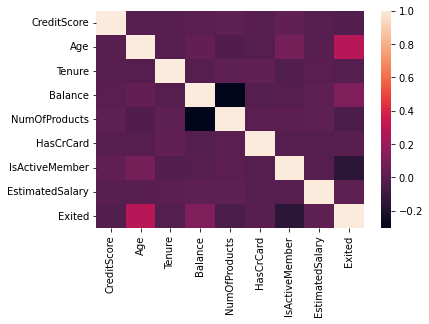

In [6]:
sns.heatmap(corr)

In [7]:
bank.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [8]:
tenure_exit_no = bank[bank.Exited==0].Tenure

In [9]:
tenure_exit_yes = bank[bank.Exited==1].Tenure

In [10]:
from matplotlib import pyplot as plt

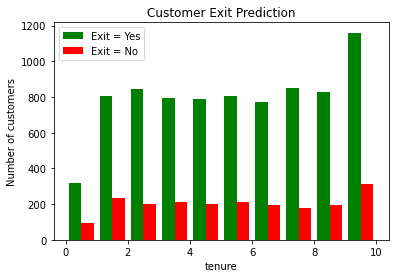

In [11]:
plt.xlabel("tenure")
plt.ylabel("Number of customers")
plt.title("Customer Exit Prediction")
plt.hist([tenure_exit_no,tenure_exit_yes],color = ['green','red'],label=['Exit = Yes', 'Exit = No'])
plt.legend()

In [12]:
bank.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [13]:
bank.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [14]:
bank['Gender'].replace({'Female':1,'Male':0},inplace =True)

In [15]:
bank['Geography'].replace({'France':0,'Spain':1,'Germany':2},inplace =True)

In [16]:
bank.dtypes

CreditScore          int64
Geography            int64
Gender               int64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [17]:
bank

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,1,42,2,0.00,1,1,1,101348.88,1
1,608,1,1,41,1,83807.86,1,0,1,112542.58,0
2,502,0,1,42,8,159660.80,3,1,0,113931.57,1
3,699,0,1,39,1,0.00,2,0,0,93826.63,0
4,850,1,1,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,0,39,5,0.00,2,1,0,96270.64,0
9996,516,0,0,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,1,36,7,0.00,1,0,1,42085.58,1
9998,772,2,0,42,3,75075.31,2,1,0,92888.52,1


In [18]:
cols_to_scale = ['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
bank[cols_to_scale] = scaler.fit_transform(bank[cols_to_scale])

In [19]:
bank

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0.538,0,1,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1
1,0.516,1,1,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0
2,0.304,0,1,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1
3,0.698,0,1,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0
4,1.000,1,1,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,0.842,0,0,0.283784,0.5,0.000000,0.333333,1,0,0.481341,0
9996,0.332,0,0,0.229730,1.0,0.228657,0.000000,1,1,0.508490,0
9997,0.718,0,1,0.243243,0.7,0.000000,0.000000,0,1,0.210390,1
9998,0.844,2,0,0.324324,0.3,0.299226,0.333333,1,0,0.464429,1


In [20]:
for col in bank:
    print(f'{col}:{bank[col].unique()}')

CreditScore:[0.538 0.516 0.304 0.698 1.    0.59  0.944 0.052 0.302 0.668 0.356 0.294
 0.252 0.398 0.57  0.532 0.606 0.474 0.752 0.764 0.572 0.32  0.638 0.992
 0.454 0.812 0.442 0.448 0.122 0.482 0.366 0.406 0.34  0.744 0.25  0.28
 0.908 0.464 0.244 0.23  0.412 0.968 0.62  0.852 0.958 0.574 0.4   0.696
 0.47  0.876 0.61  0.502 0.612 0.75  0.322 0.528 0.784 0.674 0.41  0.506
 0.802 0.462 0.77  0.622 0.65  0.776 0.926 0.614 0.508 0.338 0.628 0.656
 0.814 0.132 0.63  0.854 0.386 0.312 0.286 0.604 0.8   0.758 0.592 0.594
 0.916 0.348 0.838 0.76  0.33  0.846 0.928 0.72  0.126 0.546 0.64  0.544
 0.87  0.51  0.258 0.67  0.376 0.424 0.742 0.556 0.636 0.956 0.648 0.55
 0.164 0.84  0.816 0.89  0.672 0.878 0.478 0.222 0.468 0.458 0.626 0.664
 0.886 0.682 0.27  0.6   0.808 0.37  0.732 0.378 0.712 0.472 0.562 0.734
 0.9   0.666 0.708 0.53  0.634 0.268 0.26  0.456 0.324 0.512 0.494 0.856
 0.328 0.35  0.73  0.46  0.914 0.342 0.818 0.332 0.722 0.536 0.586 0.642
 0.678 0.54  0.652 0.444 0.69  0.484 0.43

In [21]:
x = bank.drop('Exited', axis='columns')
y = bank['Exited']

In [22]:
x

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,0.538,0,1,0.324324,0.2,0.000000,0.000000,1,1,0.506735
1,0.516,1,1,0.310811,0.1,0.334031,0.000000,0,1,0.562709
2,0.304,0,1,0.324324,0.8,0.636357,0.666667,1,0,0.569654
3,0.698,0,1,0.283784,0.1,0.000000,0.333333,0,0,0.469120
4,1.000,1,1,0.337838,0.2,0.500246,0.000000,1,1,0.395400
...,...,...,...,...,...,...,...,...,...,...
9995,0.842,0,0,0.283784,0.5,0.000000,0.333333,1,0,0.481341
9996,0.332,0,0,0.229730,1.0,0.228657,0.000000,1,1,0.508490
9997,0.718,0,1,0.243243,0.7,0.000000,0.000000,0,1,0.210390
9998,0.844,2,0,0.324324,0.3,0.299226,0.333333,1,0,0.464429


In [23]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)

In [26]:
x_train.shape

(8000, 10)

In [27]:
import tensorflow as tf
from tensorflow import keras

In [28]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape = (10,), activation = 'relu'),
    keras.layers.Dense(15, activation = 'relu'),
    keras.layers.Dense(1, activation = 'sigmoid')

])

#softmax and sigmoid is both used for activation

In [29]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [30]:
model.fit(x_train,y_train,epochs = 100)

Epoch 1/100
250/250 [==============================] - 2s 926us/step - loss: 0.5192 - accuracy: 0.7912
Epoch 2/100
250/250 [==============================] - 0s 829us/step - loss: 0.4831 - accuracy: 0.7977
Epoch 3/100
250/250 [==============================] - 0s 744us/step - loss: 0.4725 - accuracy: 0.7977
Epoch 4/100
250/250 [==============================] - 0s 770us/step - loss: 0.4610 - accuracy: 0.8024
Epoch 5/100
250/250 [==============================] - 0s 747us/step - loss: 0.4496 - accuracy: 0.8080
Epoch 6/100
250/250 [==============================] - 0s 765us/step - loss: 0.4384 - accuracy: 0.8106
Epoch 7/100
250/250 [==============================] - 0s 773us/step - loss: 0.4272 - accuracy: 0.8180
Epoch 8/100
250/250 [==============================] - 0s 729us/step - loss: 0.4181 - accuracy: 0.8221
Epoch 9/100
250/250 [==============================] - 0s 709us/step - loss: 0.4103 - accuracy: 0.8216
Epoch 10/100
250/250 [==============================] - 0s 729us/step - l

In [31]:
yp = model.predict(x_test)
yp

array([[0.08353758],
       [0.04972968],
       [0.33417806],
       ...,
       [0.00617307],
       [0.8763295 ],
       [0.06431562]], dtype=float32)

In [32]:
y_pred = []
for i in yp:
    if i>0.5 :
        y_pred.append(1)
    else :
        y_pred.append(0)

In [33]:
y_test[:10]

3875    0
1750    0
697     1
5949    1
5772    0
5911    0
3222    0
2643    0
7133    0
7468    0
Name: Exited, dtype: int64

In [34]:
y_pred[:10]

[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]

In [35]:
from sklearn.metrics import classification_report

In [36]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1581
           1       0.75      0.48      0.58       419

    accuracy                           0.86      2000
   macro avg       0.81      0.72      0.75      2000
weighted avg       0.85      0.86      0.84      2000



In [37]:
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_pred)

<AxesSubplot:>

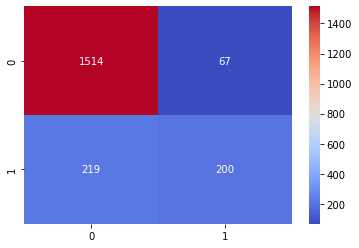

In [38]:
sns.heatmap(cm , annot=True,fmt = 'd',cmap='coolwarm')

In [39]:
accuracy = ((1505+193)/(1505+193+222+80))

In [40]:
accuracy

0.849